In [122]:
import TMQGP as tm

In [123]:
import QuarkTM
from numpy import *
from scipy.integrate import quad

In [124]:
from scipy.misc import derivative

In [125]:
qrange = linspace(0, 5, 21)
erange = linspace(-5, 5, 101)

In [126]:
m = 0.5

In [151]:
pt = QuarkTM.Particle(m, qrange, erange, eps=5e-2)

In [152]:
Nc = 3
Nf = 3
Ns = 2

In [153]:
def Pfree(mu, T):
    UL = 5
    res =  quad(lambda z: z*z*T*log(1 + exp((-sqrt(m**2 + z**2) - mu)/T)) /2/pi**2, 0, UL)[0]
    res += quad(lambda z: z*z*T*log(1 + exp((-sqrt(m**2 + z**2) + mu)/T)) /2/pi**2, 0, UL)[0]
    return Nc*Nf*Ns*res

In [154]:
Trange = linspace(0.15, .5, 12)

In [155]:
ps0 = array([Pfree(0, T) for T in Trange])

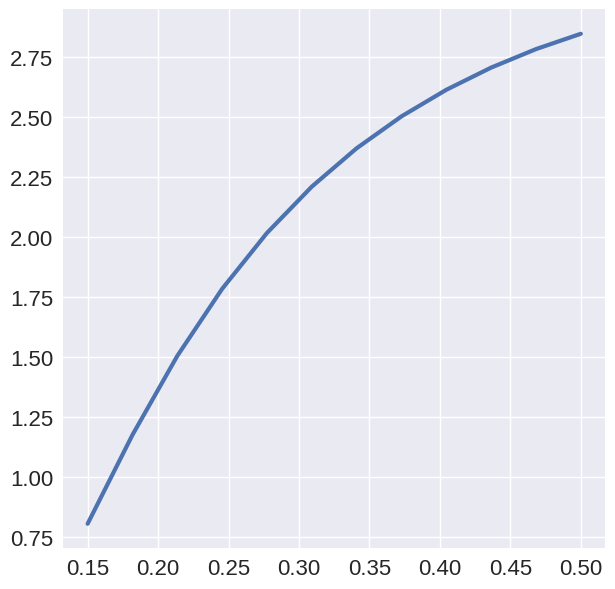

In [156]:
plt.plot(Trange, ps0/Trange**4)

In [157]:
chi2 = array([derivative(lambda z: Pfree(z, T)/T**2, 0, dx=1e-2, n=2) for T in Trange])

/tmp/ipykernel_92191/3126564020.py:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  chi2 = array([derivative(lambda z: Pfree(z, T)/T**2, 0, dx=1e-2, n=2) for T in Trange])


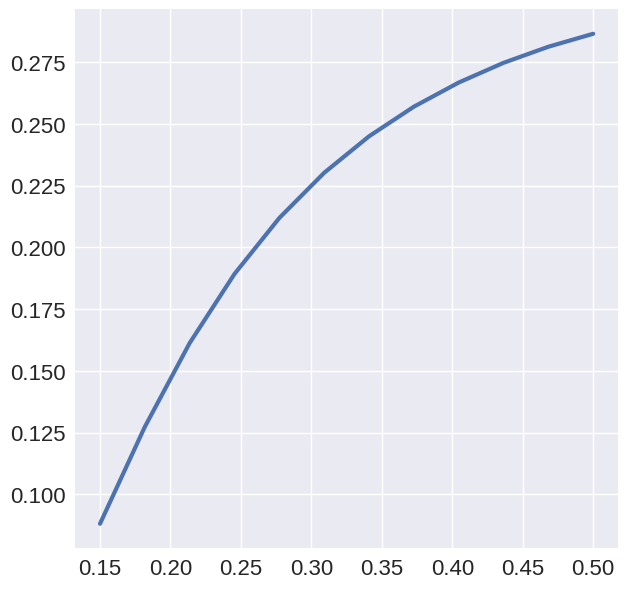

In [158]:
plt.plot(Trange, chi2/9)

Now numeric version

In [159]:
Earr = array([erange for q in qrange])
omArr = array([sqrt(pt.m**2 + qrange**2) for e in erange]).transpose()

In [160]:
ImS = array([pt.eps*erange/erange for q in qrange])
ReS = array([0*pt.eps*(1 + np.tanh(erange/0.001))/2 for q in qrange])

/tmp/ipykernel_92191/1650739579.py:1: RuntimeWarning: invalid value encountered in divide
  ImS = array([pt.eps*erange/erange for q in qrange])


In [161]:
def G(om, q, eps=5e-2):
    return 1./(om - sqrt(pt.m**2 + q**2) - 1j*eps)
    

In [162]:
Gtab = np.array([[G(om, q) for om in erange] for q in qrange])

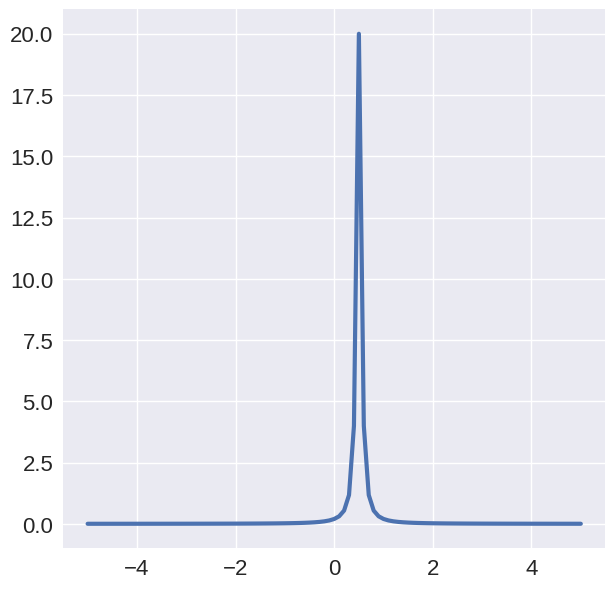

In [163]:
plt.plot(erange, imag(Gtab)[0, :])

In [164]:
Gtab = np.nan_to_num((1/(Earr - omArr - 1j*ImS + 0)).transpose())

/tmp/ipykernel_92191/1144203610.py:1: RuntimeWarning: invalid value encountered in divide
  Gtab = np.nan_to_num((1/(Earr - omArr - 1j*ImS + 0)).transpose())


In [165]:
plt.plot(erange, imag(Gtab[:, 30])

SyntaxError: incomplete input (1998446117.py, line 1)

In [166]:
def P(mu, T, eps=1e-2):
    # Earr = array([erange for q in qrange])
    # omArr = array([])
    # Gtab = np.array([[G(om, q, eps) for om in erange] for q in qrange])
    # Gtab = pt.Gtab
    res_Q = 0
    res_S = 0
    for _mu in [mu, -mu]:
        Gtab = np.array([[pt.G0(e, q, mu=_mu) for q in qrange] for e in erange])
        iImG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(imag(Gtab)))
        iReG = tm.Interpolator2D(qrange, erange, np.ascontiguousarray(real(Gtab)))
    
        ImS = array([[pt.eps for q in qrange] for e in erange])
        ReS = array([0*pt.eps*(1 + np.tanh(erange/0.001))/2 for q in qrange]).transpose()
    
        iImS = tm.Interpolator2D(qrange, erange, ImS)
        iReS = tm.Interpolator2D(qrange, erange, ascontiguousarray(ReS))
    
        res_Q += tm.OmQ_F(T, iImG, iReG)
        res_S += tm.OmS_F(T, iImG, iReG, iImS, iReS)
    print(mu, T, res_Q, res_S)
    return res_Q, res_S

In [167]:
import tqdm

In [168]:
ps_out = array([P(1*T, T) for T in tqdm.tqdm(Trange)])

 33%|██████████████████████████▋                                                     | 4/12 [00:00<00:00, 14.06it/s]

0.15 0.15 0.05931864907353442 -0.05927672133972128
0.18181818181818182 0.18181818181818182 0.05955668342817773 -0.05944149546686113
0.21363636363636362 0.21363636363636362 0.059916430273427634 -0.05963577934528422
0.24545454545454543 0.24545454545454543 0.06042860567099041 -0.059862174488286
0.2772727272727272 0.2772727272727272 0.06112712281269733 -0.060125720640840666


 67%|█████████████████████████████████████████████████████▎                          | 8/12 [00:00<00:00, 12.08it/s]

0.3090909090909091 0.3090909090909091 0.062112632812045265 -0.06040823524821684
0.3409090909090909 0.3409090909090909 0.06342864020369439 -0.06071393768666833
0.3727272727272727 0.3727272727272727 0.06507991447143031 -0.061065276878286084


 83%|█████████████████████████████████████████████████████████████████▊             | 10/12 [00:00<00:00, 11.10it/s]

0.40454545454545454 0.40454545454545454 0.06722751273571038 -0.06142812794737485
0.4363636363636363 0.4363636363636363 0.06996119552786853 -0.06179375368879894
0.46818181818181814 0.46818181818181814 0.07322229005117867 -0.06221087162179346


100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00, 11.33it/s]

0.5 0.5 0.07719260076768529 -0.06263972366935085


In [169]:
ps0 = array([Pfree(1*T, T) for T in Trange])

In [170]:
ps_out

array([[ 0.05931865, -0.05927672],
       [ 0.05955668, -0.0594415 ],
       [ 0.05991643, -0.05963578],
       [ 0.06042861, -0.05986217],
       [ 0.06112712, -0.06012572],
       [ 0.06211263, -0.06040824],
       [ 0.06342864, -0.06071394],
       [ 0.06507991, -0.06106528],
       [ 0.06722751, -0.06142813],
       [ 0.0699612 , -0.06179375],
       [ 0.07322229, -0.06221087],
       [ 0.0771926 , -0.06263972]])

(0.0, 5.0)

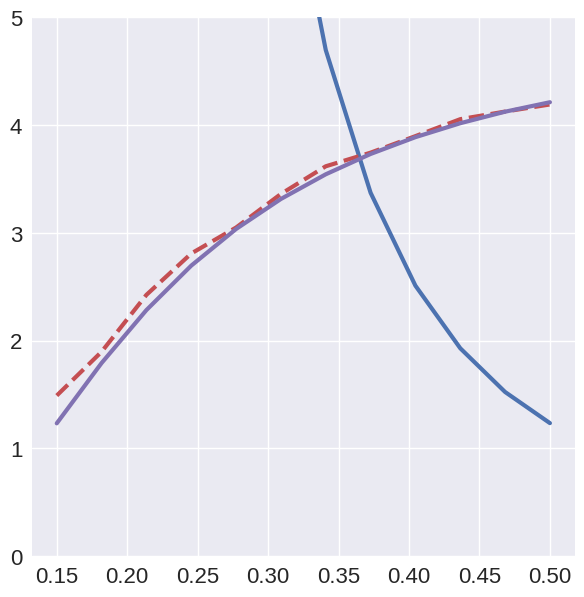

In [171]:
plt.plot(Trange, ps_out[:, 0]/Trange**4)
plt.plot(Trange, ps_out[:, 1]/Trange**4)
plt.plot(Trange, Nc*Nf*Ns*(ps_out[:, 1] + ps_out[:, 0])/Trange**4, ls='--')
plt.plot(Trange, ps0/Trange**4)
plt.ylim(0, 5)

In [172]:
chi2_num = array([derivative(lambda z: sum(P(z, T), axis=0)/T**2, 0, dx=2e-1, n=2) for T in tqdm.tqdm(Trange)])

  0%|                                                                                        | 0/12 [00:00<?, ?it/s]/tmp/ipykernel_92191/1759815307.py:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  chi2_num = array([derivative(lambda z: sum(P(z, T), axis=0)/T**2, 0, dx=2e-1, n=2) for T in tqdm.tqdm(Trange)])
  8%|██████▋                                                                         | 1/12 [00:00<00:01,  5.62it/s]

-0.2 0.15 0.05938662974204295 -0.05933303495582374
0.0 0.15 0.059234282498228485 -0.059204694950905946
0.2 0.15 0.05938662974204295 -0.05933303495582374
-0.2 0.18181818181818182 0.05959001042968237 -0.05946345496843222
0.0 0.18181818181818182 0.05941279011484806 -0.05933350741037531


 17%|█████████████▎                                                                  | 2/12 [00:00<00:01,  5.27it/s]

0.2 0.18181818181818182 0.05959001042968237 -0.05946345496843222
-0.2 0.21363636363636362 0.059881199331117296 -0.05961899214823478
0.0 0.21363636363636362 0.05967091240866064 -0.0594880317430113


 25%|████████████████████                                                            | 3/12 [00:00<00:01,  4.98it/s]

0.2 0.21363636363636362 0.059881199331117296 -0.05961899214823478
-0.2 0.24545454545454543 0.06028826761797279 -0.05979911120422454
0.0 0.24545454545454543 0.06003683825047186 -0.05966768519107364


 33%|██████████████████████████▋                                                     | 4/12 [00:00<00:01,  4.69it/s]

0.2 0.24545454545454543 0.06028826761797279 -0.05979911120422454
-0.2 0.2772727272727272 0.06084291514091363 -0.060003086714299075
0.0 0.2772727272727272 0.0605437969527799 -0.05987167609050467


 42%|█████████████████████████████████▎                                              | 5/12 [00:01<00:01,  4.57it/s]

0.2 0.2772727272727272 0.06084291514091363 -0.060003086714299075
-0.2 0.3090909090909091 0.061586881211628725 -0.0602300311737493
0.0 0.3090909090909091 0.06122978784088292 -0.06009905423772082


 50%|████████████████████████████████████████                                        | 6/12 [00:01<00:01,  4.27it/s]

0.2 0.3090909090909091 0.061586881211628725 -0.0602300311737493
-0.2 0.3409090909090909 0.06255837914877632 -0.060478907153847294
0.0 0.3409090909090909 0.06213721720158699 -0.06034873027467744


 58%|██████████████████████████████████████████████▋                                 | 7/12 [00:01<00:01,  4.05it/s]

0.2 0.3409090909090909 0.06255837914877632 -0.060478907153847294
-0.2 0.3727272727272727 0.06380481820083812 -0.0607485286717358
0.0 0.3727272727272727 0.06331237455042646 -0.06061948029631785


 67%|█████████████████████████████████████████████████████▎                          | 8/12 [00:01<00:01,  3.85it/s]

0.2 0.3727272727272727 0.06380481820083812 -0.0607485286717358
-0.2 0.40454545454545454 0.06537532350450156 -0.06103765954303345
0.0 0.40454545454545454 0.06480458711436686 -0.06090994497417918


 75%|████████████████████████████████████████████████████████████                    | 9/12 [00:02<00:00,  3.68it/s]

0.2 0.40454545454545454 0.06537532350450156 -0.06103765954303345
-0.2 0.4363636363636363 0.06732086742620987 -0.06134455261533961


 83%|█████████████████████████████████████████████████████████████████▊             | 10/12 [00:02<00:00,  3.52it/s]

0.0 0.4363636363636363 0.06666504077298469 -0.06121863239754116
0.2 0.4363636363636363 0.06732086742620987 -0.06134455261533961
-0.2 0.46818181818181814 0.06969280457403906 -0.061667877750339745


 92%|████████████████████████████████████████████████████████████████████████▍      | 11/12 [00:02<00:00,  3.37it/s]

0.0 0.46818181818181814 0.0689453302328993 -0.061543926799215755
0.2 0.46818181818181814 0.06969280457403906 -0.061667877750339745
-0.2 0.5 0.07254127448994405 -0.06200583592421062


100%|███████████████████████████████████████████████████████████████████████████████| 12/12 [00:03<00:00,  3.81it/s]

0.0 0.5 0.07169587382657759 -0.06188410721134231
0.2 0.5 0.07254127448994405 -0.06200583592421062


In [173]:
chi2_num

array([0.05334942, 0.07150004, 0.08690365, 0.09959126, 0.10907076,
       0.11833948, 0.12518824, 0.13078771, 0.13535069, 0.13914644,
       0.1422308 , 0.14473439])

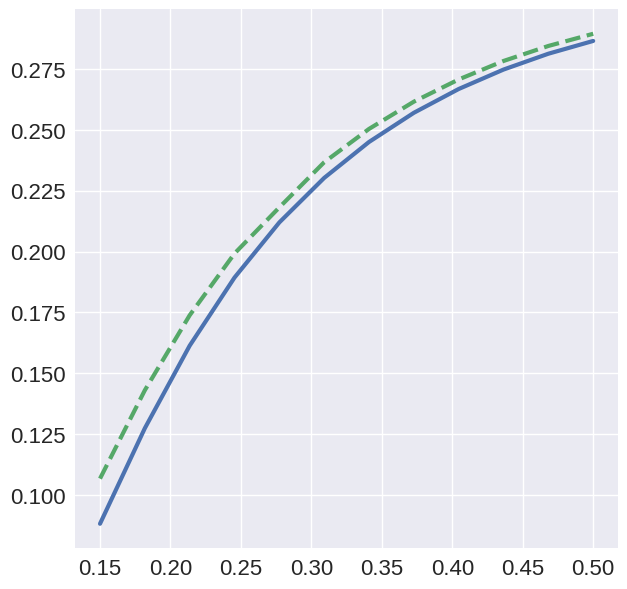

In [174]:
plt.plot(Trange, chi2/9)
plt.plot(Trange, Nc*Nf*Ns*chi2_num/9, ls='--')